# What is EDA?

EDA stands for Exploratory Data Analysis. It is an approach which plays a crucial role in the data analysis process, allowing analysts to gain a deeper understanding of the data, detect outliers, generate insights, and make informed decisions based on the observations and patterns discovered in the data.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv("train (1).csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.shape

(891, 12)

In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

It is reasonable to infer that attributes such as 'PassengerId', 'Name', and 'Ticket' number are unlikely to have a significant impact on the likelihood of survival. So, these columns can be dropped.

As we can see there are values which are missing in columns 'Age' and 'Cabin', which are needed to be handled properly.

In [7]:
train.drop(["PassengerId",'Ticket'],axis = 1,inplace = True)

After dropping 'PassengerId' and 'Ticket' column

In [8]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [9]:
data_dict = pd.DataFrame(train.dtypes)
data_dict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Cabin,object
Embarked,object


The Data Dictionary is created with the first column representing the datatype.

In [10]:
data_dict['MissingVal'] = train.isnull().sum()
data_dict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Fare,float64,0
Cabin,object,687
Embarked,object,2


The data reveals that out of the total 891 passenger records, 177 individuals have missing Age information, 687 individuals have missing Cabin details, and 2 individuals have missing Embarkation information.

In [11]:
data_dict['UniqueVal'] = train.nunique()
data_dict

,0,MissingVal,UniqueVal
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Fare,float64,0,248
Cabin,object,687,147
Embarked,object,2,3


In [12]:
# getting discriptive statistics
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the training set, it is observed that:

1. 38.3% of the individuals survived.
2. Higher proportion of people belonged to 3rd class.
3. 50% of passengers had ages ranging from 20 to 38.
Since the survival rate is 0.38, even if I decide to give a submission of all passengers being perished, I would still be having a accuracy of 62%. Hence, it is evident that relying solely on accuracy as the sole measure cannot fully determine the performance or effectiveness of the model.

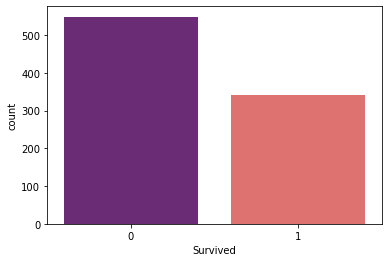

In [13]:
sns.countplot(x='Survived', data=train, palette='magma');

In [14]:
train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

It provides insights into the distribution of survival outcomes based on gender. 

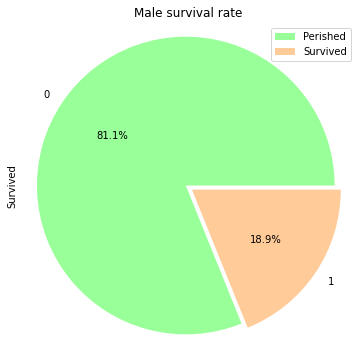

In [15]:
train[train['Sex'] == 'male'].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=['#99ff99','#ffcc99'])
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

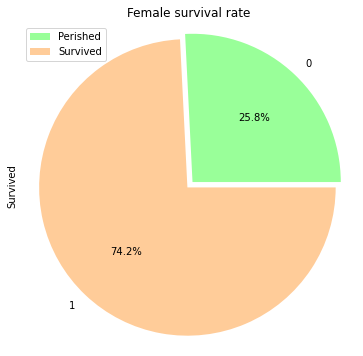

In [16]:
train[train['Sex'] == 'female'].Survived.groupby(train.Survived).count().plot(kind='pie',figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=['#99ff99','#ffcc99'])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()

The two previous plots indicate a noticeable discrepancy in the survival process between males and females, with females being given higher priority. 
This substantial difference in survival rates suggests that gender played a significant role in determining the likelihood of survival.

So now if we choose just 'Sex' as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%

In [17]:
pd.crosstab(train.Pclass, train.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


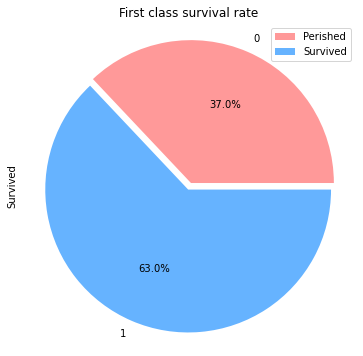

In [18]:
train[train['Pclass'] == 1].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()

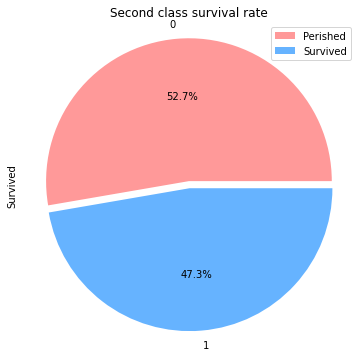

In [19]:
train[train['Pclass'] == 2].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()

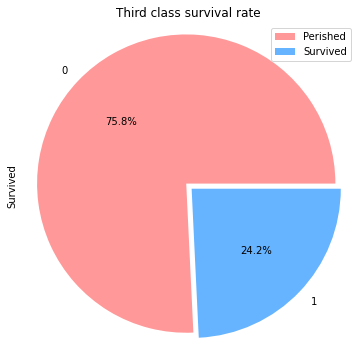

In [20]:
train[train['Pclass'] == 3].Survived.groupby(train.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%',colors=['#ff9999', '#66b3ff'])
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [21]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

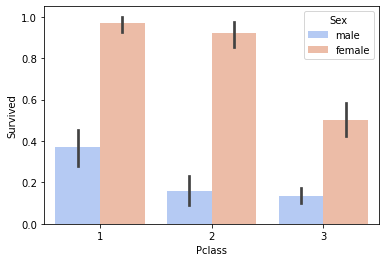

In [22]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=train, palette='coolwarm')

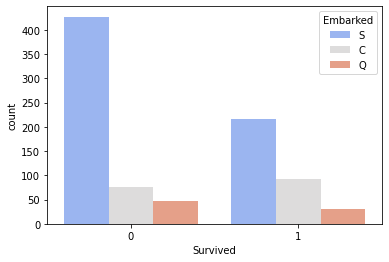

In [23]:
sns.countplot(x='Survived', hue = 'Embarked', data=train, palette='coolwarm');

In [24]:
pd.crosstab([train.Sex, train.Survived], [train.SibSp, train.Pclass], margins=True)

SibSp              0             1          2         3          4  5  8  All
Pclass             1    2    3   1   2   3  1  2   3  1  2   3   3  3  3     
Sex    Survived                                                              
female 0           1    3   33   2   3  21  0  0   3  0  0   7   4  1  3   81
       1          48   41   48  38  25  17  3  3   4  2  1   1   2  0  0  233
male   0          59   67  235  16  20  35  1  4   7  1  0   4  11  4  4  468
       1          29    9   35  15   7  10  1  1   1  0  0   0   1  0  0  109
All              137  120  351  71  55  83  5  8  15  3  1  12  18  5  7  891

The aforementioned cross-tabulation reveals two observations:

1. The majority of passengers did not have any siblings on board, while a significant number had at most one sibling accompanying them.
2. The rescue operation did not appear to prioritize passengers who had siblings on board, as the survival rates for such individuals were not significantly higher.

In essence, the data suggests that having siblings on board did not significantly influence the likelihood of survival, indicating that sibling presence did not appear to be a decisive factor in the rescue operation.

In [25]:
pd.crosstab([train.Sex, train.Survived], [train.Parch, train.Pclass], margins=True)

Parch              0             1           2          3     4     5  6  All
Pclass             1    2    3   1   2   3   1   2   3  2  3  1  3  3  3     
Sex    Survived                                                              
female 0           1    5   35   0   1  13   2   0  17  0  1  0  2  3  1   81
       1          63   40   50  17  17  12  11  11   8  2  1  0  0  1  0  233
male   0          63   81  260  10   7  22   3   3  15  0  1  1  1  1  0  468
       1          36    8   36   4   7   8   5   2   3  0  0  0  0  0  0  109
All              163  134  381  31  32  55  21  16  43  2  3  1  3  5  1  891




From the given cross-tabulation, we can infer two observations:

1. Most of the passerenges didn't had parents onboard and the majority had atmost 1 parent onboard
2. The rescue operation did not appear to prioritize passengers who had parents on board

In other words, having parents on board did not seem to have a substantial impact on the chances of survival. This suggests that the presence of parents did not play a significant role in determining the priority given during the rescue operation.


In [26]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

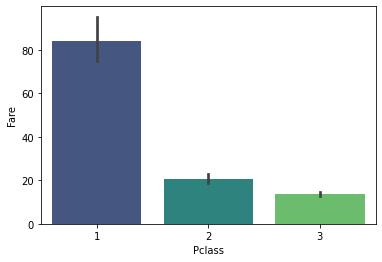

In [27]:
sns.barplot(y = "Fare",x = "Pclass",data = train,palette='viridis')

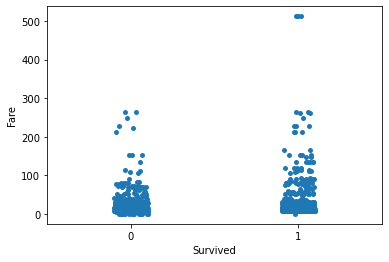

In [28]:
sns.stripplot(x='Survived', y='Fare', data=train);

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

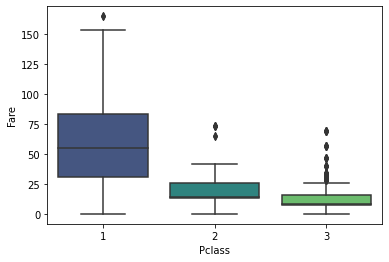

In [29]:
sns.boxplot(x = "Pclass", y = "Fare",data = train[train["Fare"] < 200], palette='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

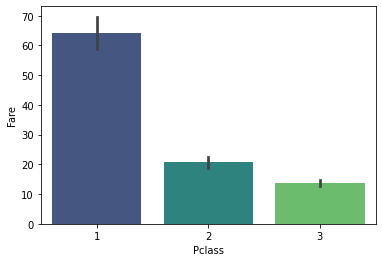

In [30]:
sns.barplot(y = "Fare",x = "Pclass",data = train[train["Fare"] < 200],palette='viridis' )

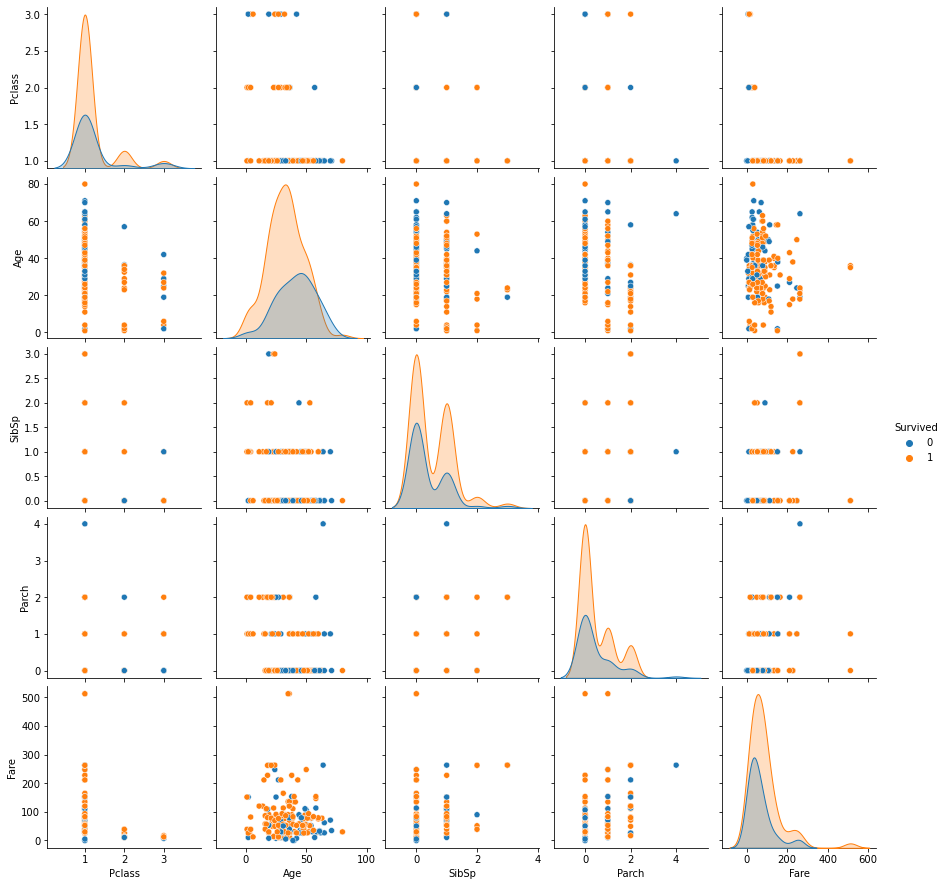

In [31]:
sns.pairplot(train.drop("Name",axis = 1).dropna(),hue = "Survived")

Not much information could be extracted from the correlation table

Now lets see how we can handle the missing values of 'Age', there are two ways:

1. By filling with mean value
i.e, train.fillna(value = df.mean())
2. Filling with Mean Value of Corresponding Survived Category.

Both options allows to handle missing values in the "Age" column of the "train" DataFrame. 

In [32]:
train.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


Values look similar.
By employing the information embedded in the "Name" column and extracting titles such as "Mr.", "Mrs.", "Master", and "Miss", we can substitute the missing age values with more contextually relevant estimates. This approach allows us to utilize the correlation between titles and age to improve the accuracy of our age imputation.

In [33]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [34]:
def extract(x):
    temp = x.split(" ")
    if "Mr." in temp:
        return "Mr"
    elif "Mrs." in temp:
        return "Mrs"
    elif "Miss." in temp:
        return "Miss"
    elif "Master." in temp:
        return "Master"
    elif "Dr." in temp:
        return "Dr"
    else:
        return None

In [35]:
train["Category"] = train["Name"].apply(extract)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Category
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr


In [36]:
train["Category"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', None, 'Dr'], dtype=object)

In [37]:
print("Mr." , np.mean(train[train["Category"] == "Mr"]["Age"]))
print("Mrs." , np.mean(train[train["Category"] == "Mrs"]["Age"]))
print("Miss." , np.mean(train[train["Category"] == "Miss"]["Age"]))
print("Master." , np.mean(train[train["Category"] == "Master"]["Age"]))
print("Dr." , np.mean(train[train["Category"] == "Dr"]["Age"]))

Mr. 32.368090452261306
Mrs. 35.898148148148145
Miss. 21.773972602739725
Master. 4.574166666666667
Dr. 42.0


This alternative approach offers a more effective solution for filling the missing values in the Age column.